<a href="https://colab.research.google.com/github/ntufar/EMV/blob/master/fastai_lesson2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Video: https://www.youtube.com/watch?v=ccMHJeQU4Qw

In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

Nicolai's copy

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [3]:
n=100

In [39]:
x = torch.ones(n,2) 
#print(x)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.1114,  1.0000],
        [-0.3605,  1.0000],
        [-0.1875,  1.0000],
        [ 0.8270,  1.0000],
        [-0.9677,  1.0000]])

In [52]:
a = tensor(3.,2); a

tensor([3., 2.])

In [45]:
y = x@a + 0.25*torch.randn(n)

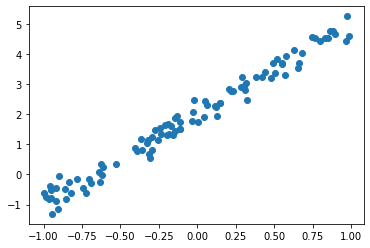

In [46]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [47]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [53]:
a = tensor(-1.,1)

In [54]:
y_hat = x@a
mse(y_hat, y)

tensor(5.7960)

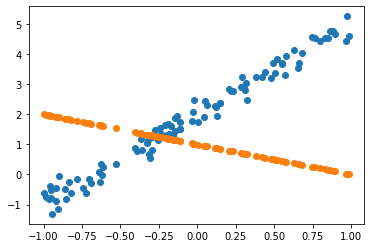

In [55]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [59]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [58]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [60]:
lr = 1e-1
for t in range(100): update()

tensor(5.7960, grad_fn=<MeanBackward0>)
tensor(1.4613, grad_fn=<MeanBackward0>)
tensor(0.4270, grad_fn=<MeanBackward0>)
tensor(0.1574, grad_fn=<MeanBackward0>)
tensor(0.0869, grad_fn=<MeanBackward0>)
tensor(0.0684, grad_fn=<MeanBackward0>)
tensor(0.0636, grad_fn=<MeanBackward0>)
tensor(0.0623, grad_fn=<MeanBackward0>)
tensor(0.0620, grad_fn=<MeanBackward0>)
tensor(0.0619, grad_fn=<MeanBackward0>)


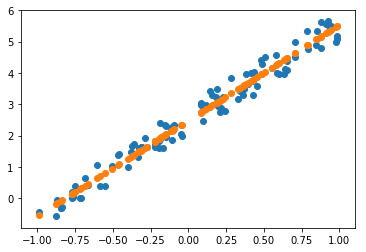

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach());

## Animate it!

In [61]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [62]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate: rate at which we change weights after each gradient descent
- Epoch: one complete run of all our images
- Minibatch: a random batch of points used to update your weights
- SGD
- Model / Architecture: mathematicala function we are fitting our parameter to
- Parameters: coefficients, weights
- Loss function: function that shows how close or far away we are from the correct answer

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.